In [40]:
# Removes the one-hot encoding as a step performed on xs
import torch
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data.dataset import random_split

# create a classifier class that inherits from nn.Module
class BigramClassifier(torch.nn.Module):
    def __init__(self):
        super(BigramClassifier, self).__init__()
        self.W = torch.nn.Parameter(torch.randn((27,27), generator=g, requires_grad=True))

    # x here is no longer a one-hot encoded vector, instead we must select the row of W that corresponds to the index of the letter
    def forward(self, x):
        return self.W[x]

words = open('names.txt').read().splitlines()
letters = sorted(list(set(''.join(words))))
letter_to_index = {letter: index for index, letter in enumerate(letters)}
letter_to_index['.'] = 0
index_to_letter = {i: letter for letter, i in letter_to_index.items()}

xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        xs.append(letter_to_index[ch1])
        ys.append(letter_to_index[ch2])

xs = torch.as_tensor(xs)
ys = torch.as_tensor(ys)

In [47]:
dataset = TensorDataset(xs, ys)

ratio = .8
n_total = len(dataset)
n_train = int(n_total * ratio)
n_val = n_total - n_train

train_data, val_data = random_split(dataset, [n_train, n_val])

# Builds a loader of each set
train_loader = DataLoader(train_data, batch_size=n_train, shuffle=True)

val_loader = DataLoader(val_data, batch_size=n_val, shuffle=True)


In [56]:
lr = 50

torch.manual_seed(42)
model = BigramClassifier()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

loss_fn = torch.nn.CrossEntropyLoss()

In [57]:
%run StepByStep.py

In [58]:
sbs = StepByStep(model, loss_fn, optimizer)
sbs.set_loaders(train_loader, val_loader)
sbs.set_tensorboard('classy')

In [59]:
sbs.train(50)

In [62]:
def plot_losses(self):
        plt.style.use('fivethirtyeight')
        fig = plt.figure(figsize=(10, 4))
        plt.plot(self.losses, label='Training Loss', c='b')

        if self.validation_loader:
            plt.plot(self.val_losses, label='Validation Loss', c='r')
        
        plt.yscale('log')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.tight_layout()
        return fig



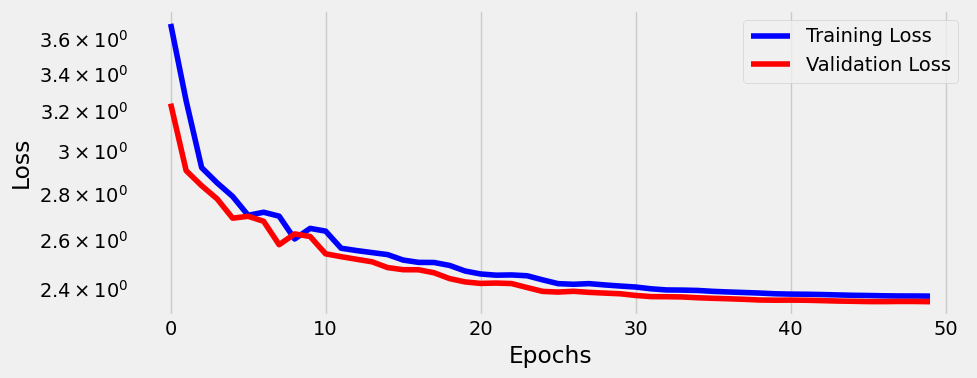

In [64]:
setattr(StepByStep, 'plot_losses', plot_losses)
fig = sbs.plot_losses()

In [65]:
sbs.save_checkpoint('model_checkpoint.pth')

In [66]:
new_sbs = StepByStep(model, loss_fn, optimizer)

In [67]:
# load the checkpoint
new_sbs.load_checkpoint('model_checkpoint.pth')

In [69]:
new_sbs.set_loaders(train_loader, val_loader)

In [70]:
new_sbs.train(50)

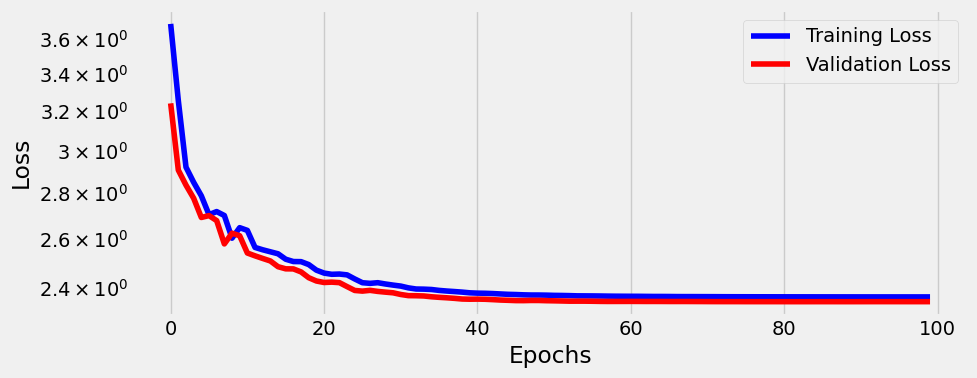

In [71]:
fig = new_sbs.plot_losses()